In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Company.csv').set_index('id')

In [3]:
df = df.drop(['Date of Birth', 'email', 'Salary', 'Phone', 'Quote', 'Income.1'], axis= 1)
df

,Full Name,gender,Job,Company,Country,Income
id,,,,,,
1,Salim Pound,Male,Editor,Gigashots,Israel,46476.638080
2,Madelene Lutas,Female,VP Marketing,Wikivu,Mongolia,54174.687950
3,Dolli Swanbourne,Female,Associate Professor,Dabfeed,Vietnam,5449.873348
4,Graeme Croisier,Male,Mechanical Systems Engineer,Trudoo,Bosnia and Herzegovina,46784.630880
5,Jillana Physic,Female,Account Executive,Buzzshare,China,57486.495560
...,...,...,...,...,...,...
996,Willie Gravestone,Female,Junior Executive,Cogilith,China,33868.404190
997,Samara McRitchie,Female,Media Manager II,Edgewire,Philippines,46290.780360
998,Joceline Josefowicz,Female,Design Engineer,Mynte,Puerto Rico,24202.032530


In [4]:
df = df.drop_duplicates()
df = df.dropna()

In [5]:
df = df.rename(columns= {'gender': 'Gender'})
df

,Full Name,Gender,Job,Company,Country,Income
id,,,,,,
1,Salim Pound,Male,Editor,Gigashots,Israel,46476.638080
2,Madelene Lutas,Female,VP Marketing,Wikivu,Mongolia,54174.687950
3,Dolli Swanbourne,Female,Associate Professor,Dabfeed,Vietnam,5449.873348
4,Graeme Croisier,Male,Mechanical Systems Engineer,Trudoo,Bosnia and Herzegovina,46784.630880
5,Jillana Physic,Female,Account Executive,Buzzshare,China,57486.495560
...,...,...,...,...,...,...
996,Willie Gravestone,Female,Junior Executive,Cogilith,China,33868.404190
997,Samara McRitchie,Female,Media Manager II,Edgewire,Philippines,46290.780360
998,Joceline Josefowicz,Female,Design Engineer,Mynte,Puerto Rico,24202.032530


In [6]:
df.dtypes

Full Name     object
Gender        object
Job           object
Company       object
Country       object
Income       float64
dtype: object

In [7]:
df.isnull().any()

Full Name    False
Gender       False
Job          False
Company      False
Country      False
Income       False
dtype: bool

In [8]:
plt.style.use('ggplot')

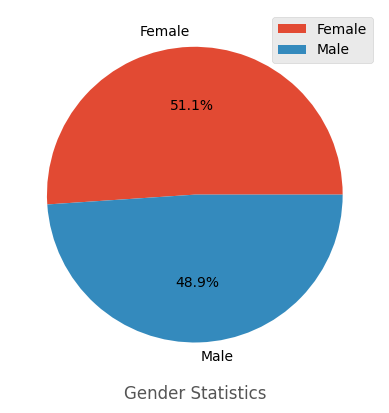

In [9]:
Gender_Count = df['Gender'].value_counts()

plt.pie(Gender_Count.values, labels= Gender_Count.index,
         autopct= '%0.1f%%')
plt.xlabel('Gender Statistics')
plt.legend()

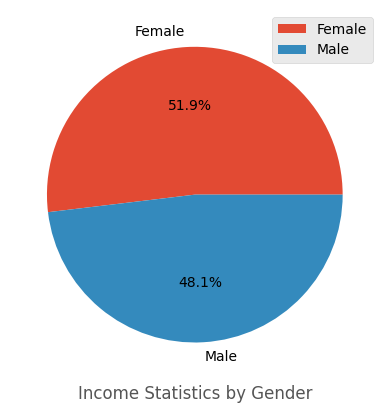

In [10]:
Gender_Income = df.groupby('Gender')['Income'].sum()

plt.pie(Gender_Income.values, labels= Gender_Income.index,
        autopct= '%0.1f%%')
plt.xlabel('Income Statistics by Gender')
plt.legend()

Text(0.5, 0, 'The Highest Income Countries')

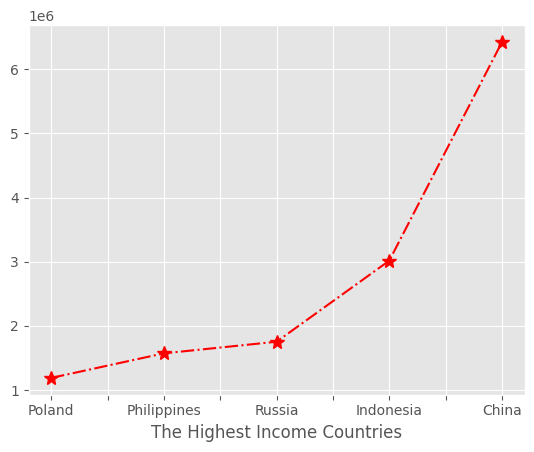

In [11]:
Country_Income = df.groupby('Country')['Income'].sum().sort_values().tail()

Country_Income.plot(kind= 'line', linestyle= 'dashdot',
         color= 'red', marker= '*', markersize= 10)
plt.xlabel('The Highest Income Countries')

Text(0.5, 0, 'The Lowest-paid Jobs')

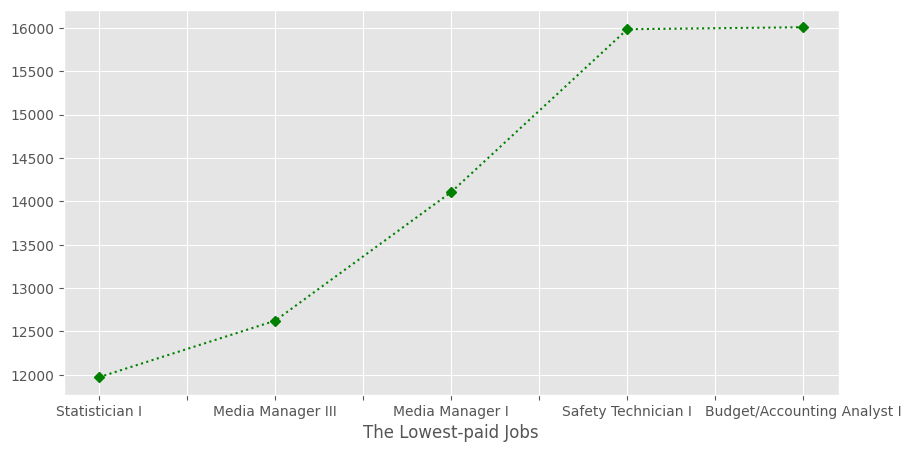

In [12]:
Job_Income = df.groupby('Job')['Income'].sum().sort_values().head()

plt.figure(figsize= (10, 5))
Job_Income.plot(kind= 'line', linestyle= 'dotted',
         color= 'green', marker= 'D', markersize= 5)
plt.xlabel('The Lowest-paid Jobs')

Text(0.5, 0, 'The Highest-paying Companies')

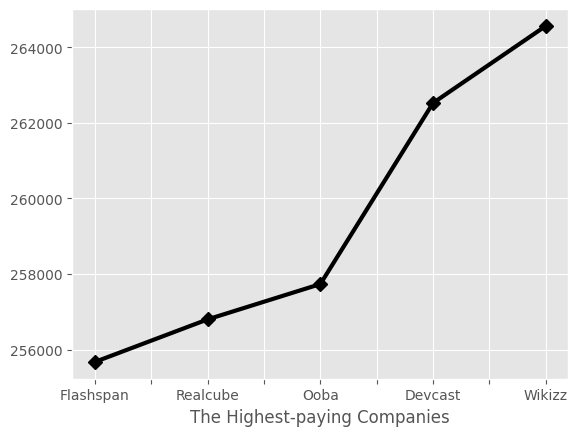

In [13]:
Company_Income = df.groupby('Company')['Income'].sum().sort_values().tail()

Company_Income.plot(kind= 'line', linewidth= 3,
                    marker= 'D', markersize= 7,
                    color= 'black')
plt.xlabel('The Highest-paying Companies')